In [14]:
!pip install tensorflow-gpu

     |████████████████████████████████| 497.5 MB 22 kB/s 
     |████████████████████████████████| 462 kB 39.1 MB/s 


In [15]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [19]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [21]:
# feature engineering

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
 
X['Geography']= label_encoder.fit_transform(X['Geography'])
X['Gender']= label_encoder.fit_transform(X['Gender'])

In [22]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [23]:

from sklearn.model_selection import train_test_split

# Splitting the data into test and train, we are testing on 0.2 = 20% of dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [24]:
# feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [25]:
X_train

array([[ 1.03360928,  1.51707993, -1.10665898, ..., -1.5482337 ,
        -1.02429504, -1.40114775],
       [ 0.78536369, -0.90661242,  0.90362073, ...,  0.64589732,
        -1.02429504,  1.6776678 ],
       [-0.64204841, -0.90661242, -1.10665898, ...,  0.64589732,
         0.97628121,  1.56314435],
       ...,
       [-0.69376624, -0.90661242, -1.10665898, ...,  0.64589732,
        -1.02429504, -1.51811653],
       [ 0.29921609, -0.90661242,  0.90362073, ..., -1.5482337 ,
         0.97628121,  1.26396131],
       [-1.66606145,  0.30523375, -1.10665898, ...,  0.64589732,
        -1.02429504, -1.08851177]])

In [26]:
X_train.shape

(8000, 10)

In [28]:
# Lets create ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [29]:
# Lets initialize the ANN
classifier = Sequential()

In [30]:
# Adding the input layer

classifier.add(Dense(units=11, activation='relu'))

In [31]:
# Adding the 1st hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [32]:
# Adding the 2nd hidden layer
classifier.add(Dense(units=6, activation='relu'))


In [33]:
# Adding the output layer

classifier.add(Dense(1, activation='sigmoid'))


In [34]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
# Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [37]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=500, callbacks=early_stopping)

Epoch 1/500
536/536 [==============================] - 2s 3ms/step - loss: 0.3211 - accuracy: 0.8690 - val_loss: 0.3450 - val_accuracy: 0.8644
Epoch 2/500
536/536 [==============================] - 2s 3ms/step - loss: 0.3220 - accuracy: 0.8670 - val_loss: 0.3436 - val_accuracy: 0.8607
Epoch 3/500
536/536 [==============================] - 2s 3ms/step - loss: 0.3204 - accuracy: 0.8681 - val_loss: 0.3470 - val_accuracy: 0.8618
Epoch 4/500
536/536 [==============================] - 2s 3ms/step - loss: 0.3206 - accuracy: 0.8696 - val_loss: 0.3449 - val_accuracy: 0.8622
Epoch 5/500
536/536 [==============================] - 2s 3ms/step - loss: 0.3207 - accuracy: 0.8677 - val_loss: 0.3431 - val_accuracy: 0.8622
Epoch 6/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3205 - accuracy: 0.8653 - val_loss: 0.3450 - val_accuracy: 0.8633
Epoch 7/500
536/536 [==============================] - 1s 3ms/step - loss: 0.3208 - accuracy: 0.8645 - val_loss: 0.3458 - val_accuracy: 0.8641

In [39]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

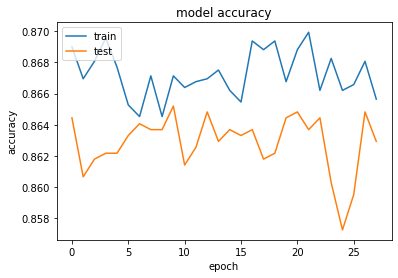

In [40]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

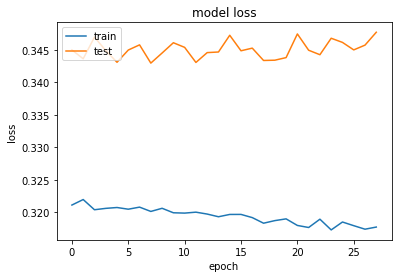

In [41]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [42]:
# making the prediction and evaluate the model

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

In [43]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [44]:
# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,y_pred)
cm



array([[1514,   81],
       [ 223,  182]])

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.69      0.45      0.54       405

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [46]:
# calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.848

In [47]:
# get the weights

classifier.get_weights()

[array([[ 2.3396561e-01,  1.4123608e-01,  7.0300281e-02,  4.2090502e-01,
         -6.3345808e-01,  1.3484764e-01, -6.3505775e-01, -6.9357075e-02,
          2.3793504e-01,  1.3459545e-01,  2.1119270e-02],
        [ 3.5516638e-02,  4.6975243e-01, -1.4893063e+00,  8.6208703e-03,
          2.7853045e-01,  4.5231616e-01, -4.4753492e-02, -1.6636384e-01,
          2.6564229e-01,  3.9703193e-01,  9.6187338e-02],
        [ 3.0073032e-02, -9.8887376e-02,  1.1586433e-01, -1.9131225e-01,
          5.8008850e-01,  3.4663406e-01,  1.3093874e-01, -4.6394626e-03,
         -4.1292736e-01,  3.7165779e-01,  1.1365915e-01],
        [-1.0253765e-01, -6.5980178e-01, -5.0402939e-01,  6.1183852e-01,
         -7.6079808e-02, -5.0557917e-01,  9.4072759e-01, -1.8260717e-01,
          5.5849597e-02,  1.5799373e-01,  4.6857378e-01],
        [ 3.2370123e-01,  9.8625019e-02,  3.6079820e-02,  3.6849417e-02,
         -1.7921574e-01,  4.0751815e-02, -1.7117611e-01, -2.0144512e-01,
          1.9026555e-01,  5.6373864e-0